In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.models import load_model

%matplotlib inline

# Pasos a Seguir:

1. importar las tuplas de datos que ofrece Mnist.
2. Vizualizar los datos.
3. Limpieza de datos.
    - Hacer un Reshape para determinar el canal del color.
    - Normalizar los datos. (Dividir en el numero maximo para dejarlos entre 0-1)
    - Usar One Hot Encoding para darle un valor probabilistico a los resultados
4. establecer y Crear el modelo de Red Neuronal.
    - se usan 2 capas consecutivas de CNN y Max Pooling. (Kernel_size = (3,3) y pool_size = (2,2))
    - Para aplanar la matriz resultante de las primeras 4 capas, se usa una Capa Flatten
    - Para estudiar los valores a considerar se usan 2 Capas Densas
    - Determinar las funciones de Activacion, las cuales serán:
        - "relu" <- para Capas Convolucionales
        - "relu" <- para la Primera Capa Densa
        - "softmax" <- para la ultima capa densa, esta para darle los valores probabilisticos
5. Compilar el modelo.
    - Optimizador: Adam
    - Loss: Categorical Cross Entropy
    - metrics: Accuracy
6. se visualiza el modelo con la funcion SUMMARY
7. se entrena el modelo
8. se grafica la funcion de perdida y se analizan las metricas
9. Se optimiza el modelo
10. Se sube a la Interfaz
    

# Importar las tuplas de datos que ofrece Mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Visualizar los datos

In [4]:
indices = np.arange(1,25)

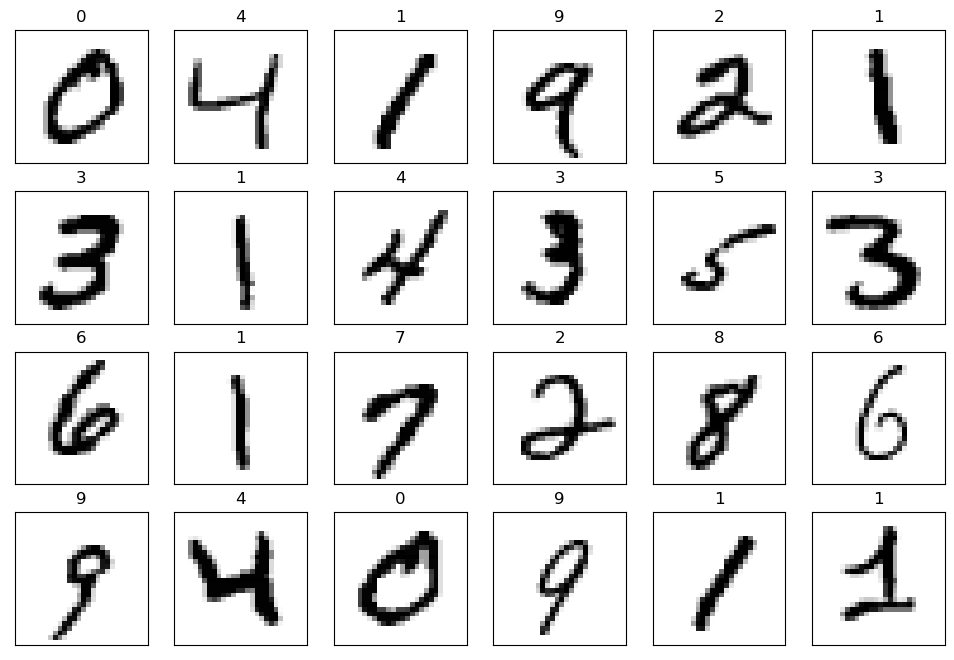

In [5]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(12,8))
for item in zip(axes.ravel(), X_train[indices], y_train[indices]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)






# Limpieza de Datos

In [6]:
#Se coloca un Canal que determina la escala de colores
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [7]:
#Normalizar los datos

X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [8]:
#One Hot Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# Modelo de Red Neuronal

In [12]:
capa1 = tf.keras.layers.Conv2D(
    kernel_size=(3,3),
    input_shape=(28,28,1),
    filters=64,
    activation="relu"
)

capa2 = tf.keras.layers.MaxPool2D(
    pool_size=(2,2)
)

capa3 = tf.keras.layers.Conv2D(
    kernel_size=(3,3),
    filters=128,
    activation="relu"
)

capa4 = tf.keras.layers.MaxPool2D(
    pool_size=(2,2)
)

capa5 = tf.keras.layers.Flatten()

capa6 = tf.keras.layers.Dense(units=128, activation= "relu")

capa7 = tf.keras.layers.Dense(units=10, activation= "softmax")

#Se arma el modelo...

model = tf.keras.Sequential([
    capa1,
    capa2,
    capa3,
    capa4,
    capa5,
    capa6,
    capa7])

#se compila el modelo...

model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3200)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [13]:
#vamos a entrenar el modelo...

entrenamiento = model.fit(X_train, y_train, batch_size= 64, validation_split=.1, epochs=10)

print("Modelo entrenado!")

Epoch 1/10
844/844 [==============================] - 63s 73ms/step - loss: 0.1445 - accuracy: 0.9558 - val_loss: 0.0448 - val_accuracy: 0.9875
Epoch 2/10
844/844 [==============================] - 60s 71ms/step - loss: 0.0430 - accuracy: 0.9867 - val_loss: 0.0487 - val_accuracy: 0.9840
Epoch 3/10
844/844 [==============================] - 65s 77ms/step - loss: 0.0295 - accuracy: 0.9907 - val_loss: 0.0320 - val_accuracy: 0.9910
Epoch 4/10
844/844 [==============================] - 53s 63ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0389 - val_accuracy: 0.9902
Epoch 5/10
844/844 [==============================] - 54s 64ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0404 - val_accuracy: 0.9890
Epoch 6/10
844/844 [==============================] - 52s 61ms/step - loss: 0.0117 - accuracy: 0.9959 - val_loss: 0.0391 - val_accuracy: 0.9913
Epoch 7/10
844/844 [==============================] - 55s 65ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0378 - val_accuracy:

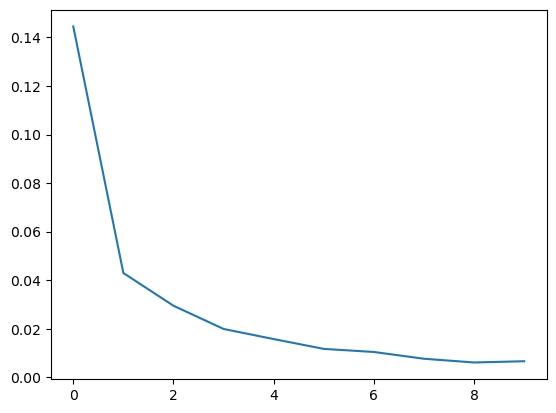

In [14]:
plt.plot(entrenamiento.history["loss"])

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
prediccion = model.predict(X_test)
for indice, probabilidad in enumerate(prediccion[0]):
    print(f'{indice}: {probabilidad:.10%}')


313/313 [==============================] - 3s 10ms/step
0: 0.0000000000%
1: 0.0000000000%
2: 0.0000000068%
3: 0.0000000002%
4: 0.0000000000%
5: 0.0000000000%
6: 0.0000000000%
7: 100.0000000000%
8: 0.0000000000%
9: 0.0000001937%


In [16]:
incorrectos = []
images = X_test.reshape(10000, 28, 28)
for i, (p,e) in enumerate(zip(prediccion, y_test)):
    predicciones, esperados = np.argmax(p), np.argmax(e)

    if predicciones != esperados:
        incorrectos.append((i, images[i], predicciones, esperados))


In [17]:
len(incorrectos)

88

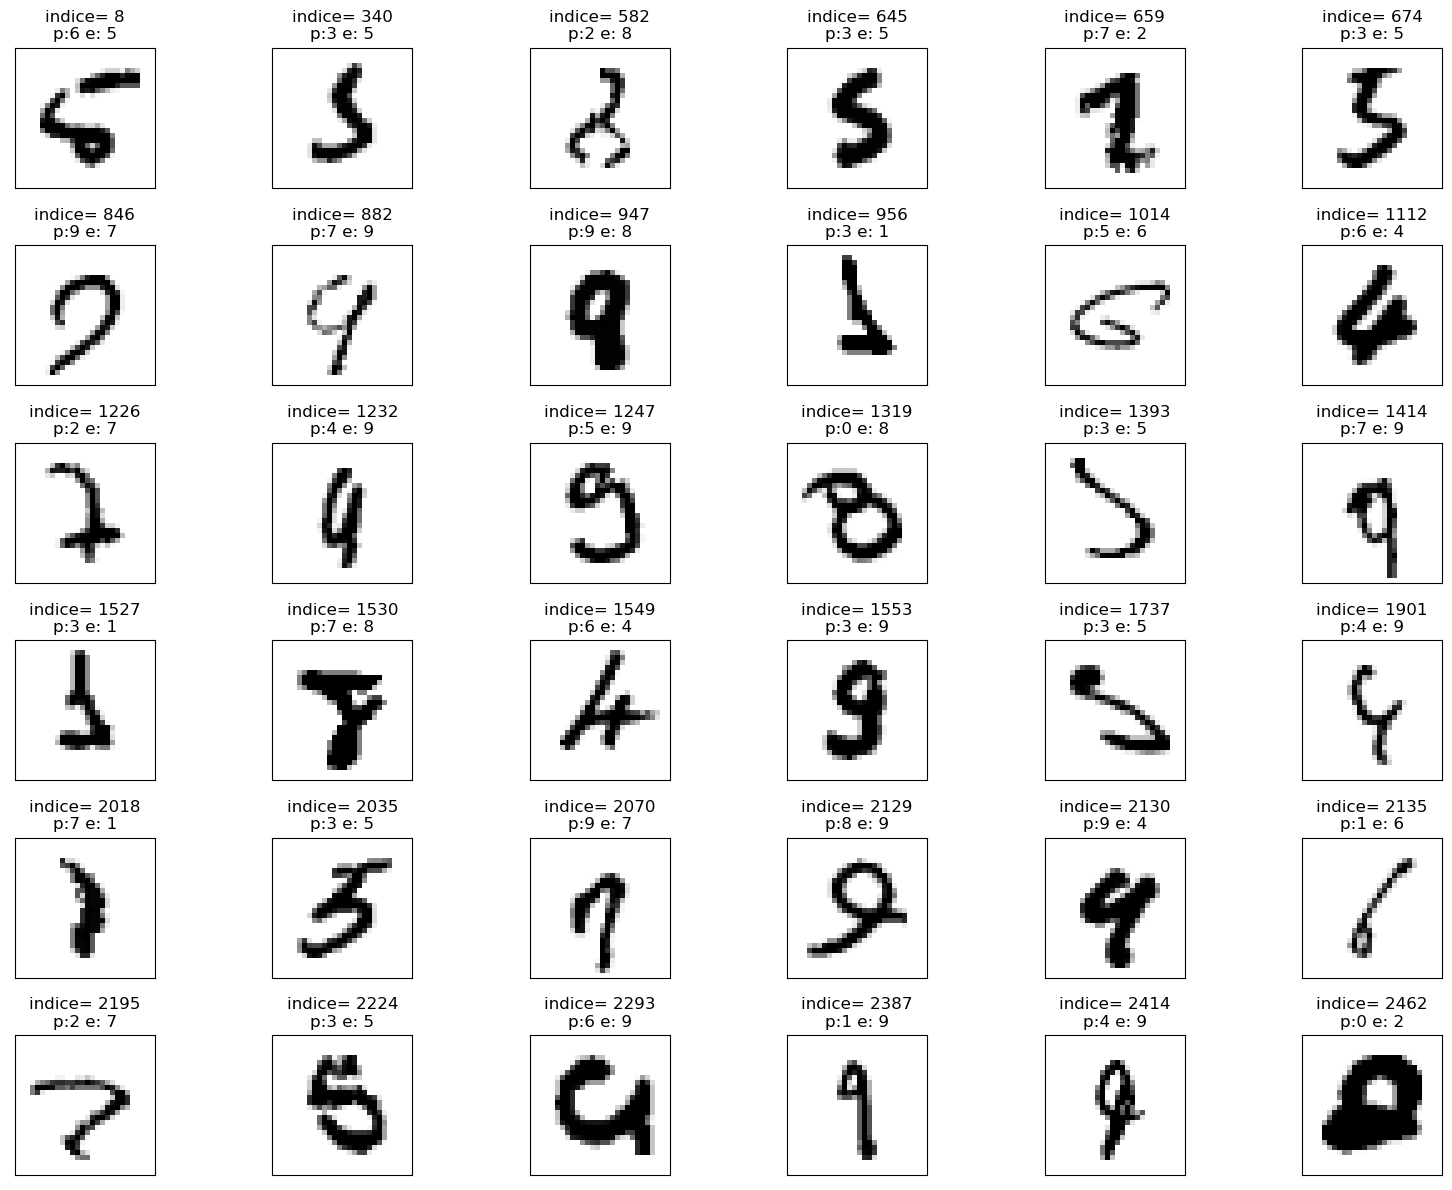

In [18]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(16,12))

for axes, item in zip(axes.ravel(), incorrectos):
    index, image, predicciones, esperados = item
    axes.imshow(image, cmap = plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(f'indice= {index}\np:{predicciones} e: {esperados}')
plt.tight_layout()

In [19]:
def prob(prediction):
    for index, probability in enumerate(prediction):
        print(f"{index}: {probability:.10%}")


In [20]:
prob(prediccion[947])


0: 0.0060774913%
1: 0.0200307128%
2: 0.0014623041%
3: 0.0540062843%
4: 0.0001430877%
5: 0.0000000701%
6: 0.0000122226%
7: 0.0014705987%
8: 1.2151639909%
9: 98.7016379833%


In [23]:
9912/10000

0.9912